In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten,BatchNormalization,Dropout

In [ ]:
#generator
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256 , 256) # giving same size to data
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256 , 256) # giving same size to data
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image , label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#crate CNN
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1 , activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,541,893 (169.91 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,694,596 (113.28 MB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.5901 - loss: 0.7061 - val_accuracy: 0.7357 - val_loss: 0.5252
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.7393 - loss: 0.5214 - val_accuracy: 0.8257 - val_loss: 0.3868
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - accuracy: 0.8268 - loss: 0.3801 - val_accuracy: 0.8765 - val_loss: 0.2899
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 107ms/step - accuracy: 0.9113 - loss: 0.2148 - val_accuracy: 0.9212 - val_loss: 0.2216
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 129ms/step - accuracy: 0.9601 - loss: 0.1074 - val_accuracy: 0.9316 - val_loss: 0.2103
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 129ms/step - accuracy: 0.9769 - loss: 0.0652 - val_accuracy: 0.9512 - val_loss: 0.1626
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9831 - loss: 0.0548 - val_accuracy: 0.9651 - val_loss: 0.1020
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 106ms/step - accuracy: 0.9860 - loss: 0

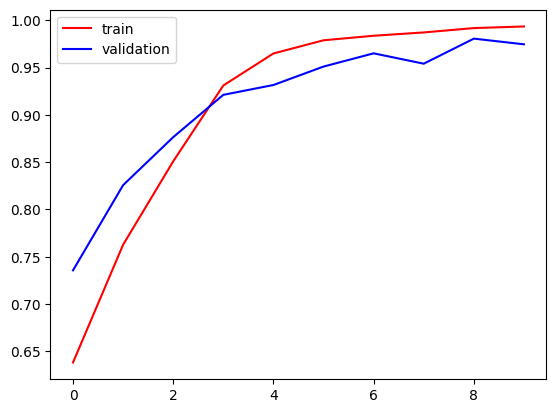

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

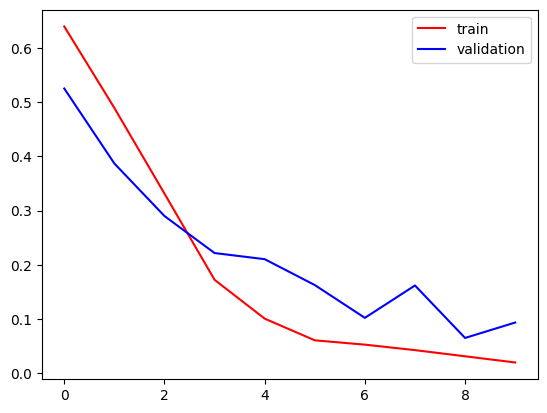

In [ ]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

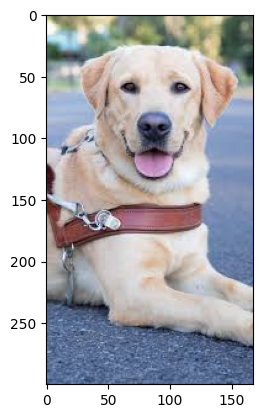

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ensure the image path is correct
image_path = '/content/images.jfif'  # Double-check this path

# Load the image
test_img = cv2.imread(image_path)

# Verify if the image was loaded successfully
if test_img is not None:
    # Convert the image from BGR to RGB if needed
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()
else:
    print(f"Error: Could not load image from {image_path}. Please check the file path.")

In [ ]:
test_img.shape

(300, 168, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.19533725e-08]], dtype=float32)

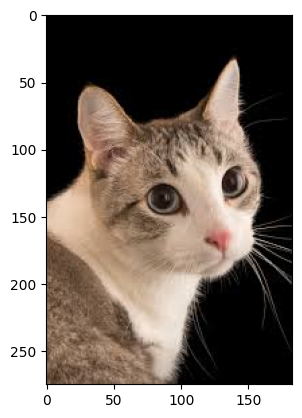

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ensure the image path is correct
image_path = '/content/cat.jfif'  # Double-check this path

# Load the image
test_img = cv2.imread(image_path)

# Verify if the image was loaded successfully
if test_img is not None:
    # Convert the image from BGR to RGB if needed
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()
else:
    print(f"Error: Could not load image from {image_path}. Please check the file path.")

In [ ]:
test_img.shape

(275, 183, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.5413135]], dtype=float32)